# Lab 1 - Audio in Python
*In this tutorial, we will synthesize a sine tone from an array of values and plot it. We'll listen to the signal in the notebook and also export it as a WAV file. Finally, we'll import a WAV file and crop it.*

___

## Generating a Sine Tone

First, we need to import __NumPy__, a python package for scientific computing.

In [1]:
import numpy as np

Next, we'll create variables to hold the **frequency**, **duration**, and **sampling rate** of our sine tone. Let's generate a tone at **440 Hz** that lasts **3 seconds** long with a sampling rate of **22050 Hz**.

In [2]:
sampling_rate = 22050
freq = 440
duration = 3

We can make an array of time values, **t**, which contains each point in time that we want a sample. The **np.linspace** function below creates an array of 66,150 evenly spaced numbers ranging from 0 to 3.

In [3]:
t = np.linspace(0, 3, 66150)

Since the **t** array is very long, only the first few and last few values are displayed below.

In [4]:
t

array([0.00000000e+00, 4.53521595e-05, 9.07043190e-05, ...,
       2.99990930e+00, 2.99995465e+00, 3.00000000e+00])

To generate a sine tone, at each point in time, we want to plug our current t value into a sine function. 

$$x = \sin( 2 \pi f t)$$

NumPy's **np.sin** function lets us plug an array of time values in and get an array of output values. We'll store the output in a variable called **x**.

In [5]:
x = np.sin(2*np.pi*freq*t)

Looking at just these few values, it's hard to tell we made a sine wave. Let's visualize it.

---

## Plotting a Signal

First we need to import **matplotlib.pyplot** for creating plots.

In [6]:
import matplotlib.pyplot as plt

The following line allows plots to be visible within the notebook.

In [7]:
%matplotlib inline

First, the **plt.figure** line below allows us to adjust the size of the figure. Then, we simply call **plt.plot** to plot the signal. The semi colon suppresses output from python.

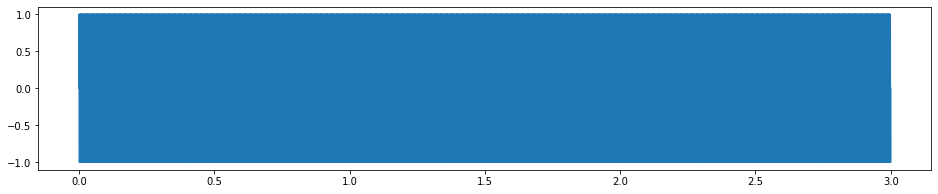

In [8]:
plt.figure(figsize=(16,3))
plt.plot(t,x)

This just looks like a blue rectangle since the sine wave oscillates quickly in a short space. To see the sine wave, we'll use **plt.xlim** to crop the plot's range along the x axis. Let's look at just the first **5 milliseconds**. Also we'll label the seconds along the x axis.

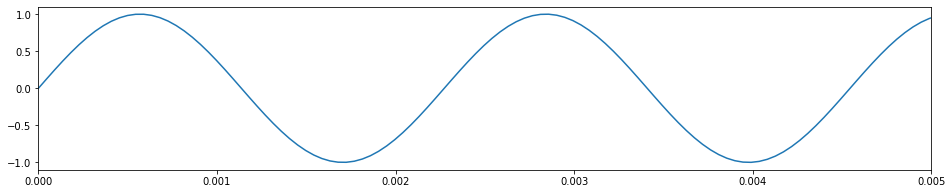

In [9]:
plt.figure(figsize=(16,3))
plt.xlim(0, 0.005)
plt.plot(t,x)

Now that we've visualized our signal, let'ls listen to it.

---

## Listening to an Audio Signal

Using **IPython.display.Audio**, we can listen to an audio signal from a NumPy array. Let's import IPython display.

In [10]:
import IPython.display as ipd

Now we just need to give the **ipd.Audio** function our signal **x** and its sampling rate **sr**, and we can play the sound right in the notebook.

In [11]:
ipd.Audio(x, rate=sampling_rate)

---

## Exporting Audio


In addition to listening to a signal in the notebook, we can export it as a WAV file using the **Librosa** audio signal processing library. Let's import it.

In [12]:
import librosa

To export an array as a sound file we can use the **librosa.output.write_wav** function. Simply pass it the signal, its sampling rate, and the desired filename.

In [13]:
librosa.output.write_wav("sine_440_3s.wav", x, sampling_rate)

Now, there should be an audio file called **'sine_440_3s.wav'** saved in the same directory as this notebook.

---

## Importing Audio

We can also *import* audio from a WAV file into a numpy array using **Librosa.** Let's import the audio file **taxman.wav**, which should be saved in the same directory as this notebook. The **librosa.load** function will return the audio signal as an array, **y**, as well as its sampling rate.

In [14]:
y, sr_y = librosa.load("taxman.wav")

Let's visualize the signal **y** and listen to it. This time we'll plot with **librosa.display.waveplot**, which is useful for cleanly displaying the amplitude envelope of time domain audio signals.

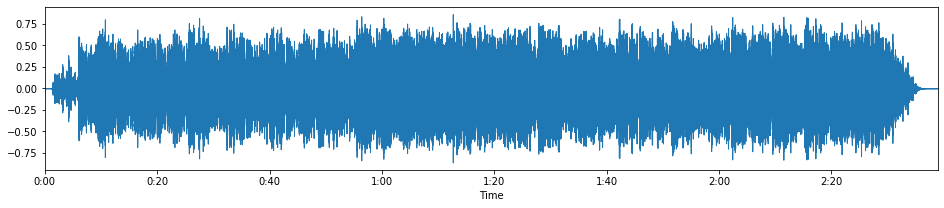

In [15]:
import librosa.display
plt.figure(figsize=(16,3))
librosa.display.waveplot(y, sr=sr_y)

In [16]:
ipd.Audio(y, rate=sr_y)

---

## Cropping an Audio Signal

Finally, let's edit this audio signal by cropping a **5 second** clip of the beginning. We'll compute the clip length in samples using the sampling rate.

In [17]:
i = sr_y*5

We can use simple array slicing to do the cropping.

In [18]:
y_crop = y[0:i]

Let's **plot**, **listen to**, and **export** our clip.

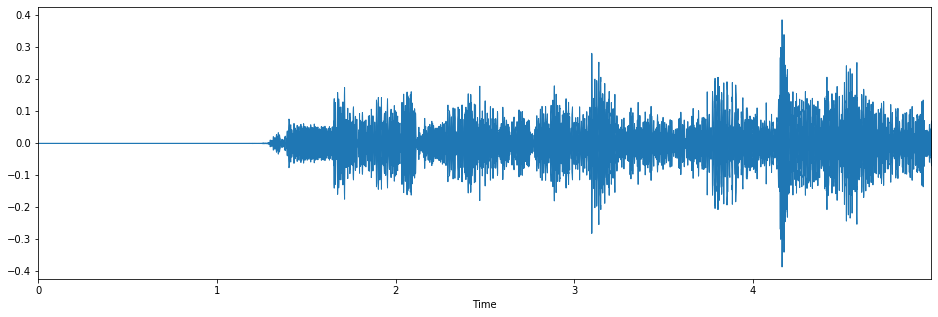

In [19]:
plt.figure(figsize=(16,5))
librosa.display.waveplot(y_crop, sr=sr_y)

In [20]:
ipd.Audio(y_crop, rate=sr_y)

In [21]:
librosa.output.write_wav("taxman_5s.wav", y_crop, sr_y)